# Heart Failure Prediction using ANN

### Importing Libraries 

In [1]:
import numpy as np  
import pandas as pd    
import matplotlib.pyplot as plt  
import seaborn as sns    
from sklearn.ensemble import RandomForestRegressor  
from sklearn.linear_model import LinearRegression  
, Lasso 
from scipy.stats import norm    # For some statistics<jupyter_output><empty_output><jupyter_text>Load
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.feature_selection import RFE  
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [2]:
data = pd.read_csv('heart_data.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
# making all column names in lowecase 
data.columns = data.columns.str.lower()

# EDA

Visualising the data 

Distribution of death by heart failure in dataset 

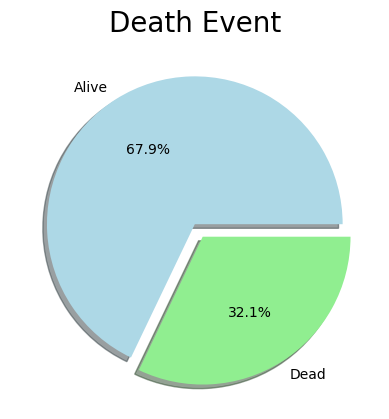

In [5]:
plt.Figure(figsize=(7,7))
plt.pie(data['death_event'].value_counts(),labels=['Alive','Dead'],autopct='%1.1f%%', shadow=True, explode=[0,0.1],colors=['lightblue','lightgreen'])
plt.title('Death Event', fontsize=20)
plt.show()

Sex Destribution

In [6]:
data['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

Relation between gender and death event 

<AxesSubplot: xlabel='sex', ylabel='count'>

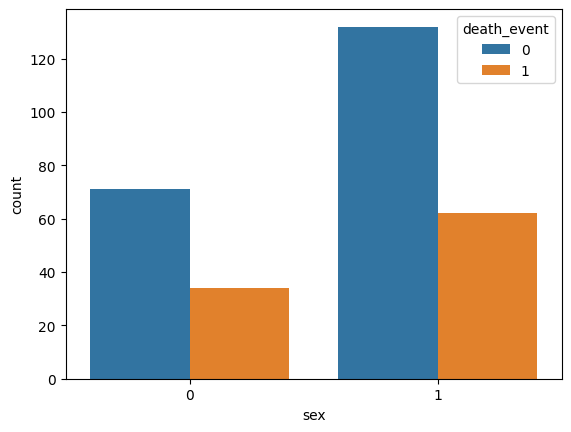

In [7]:
plt.Figure(figsize=(7,7))
sns.countplot(x='sex',hue='death_event',data=data)

Relation Between AGE and Death event 

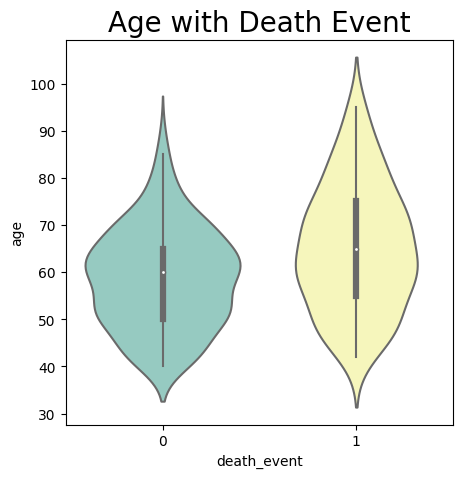

In [8]:
plt.figure(figsize=(5,5))
sns.violinplot(x='death_event',y='age',data=data, palette='Set3')
plt.title('Age with Death Event',fontsize=20)
plt.show()

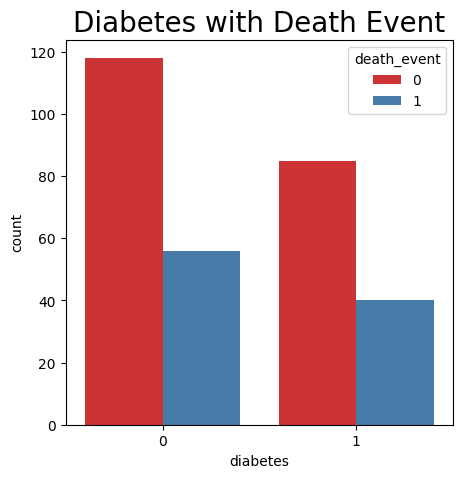

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(x='diabetes',hue='death_event',data=data, palette='Set1')
plt.title('Diabetes with Death Event',fontsize=20)
plt.show()

How Smoking Causes of heart Failure ?

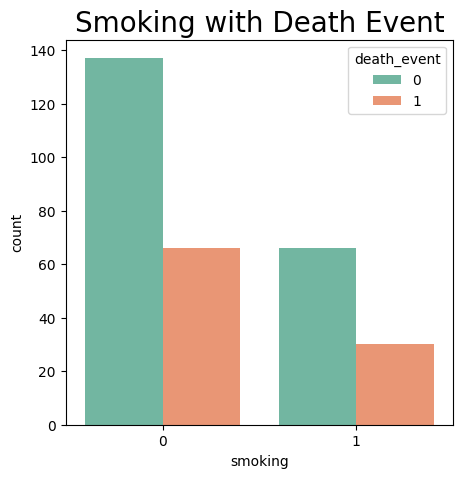

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoking',hue='death_event',data=data, palette='Set2')
plt.title('Smoking with Death Event',fontsize=20)
plt.show()

## Data Preprocessing

In [11]:
# finding Null values 

data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

Hopefully there is no NULL value in Datasets 

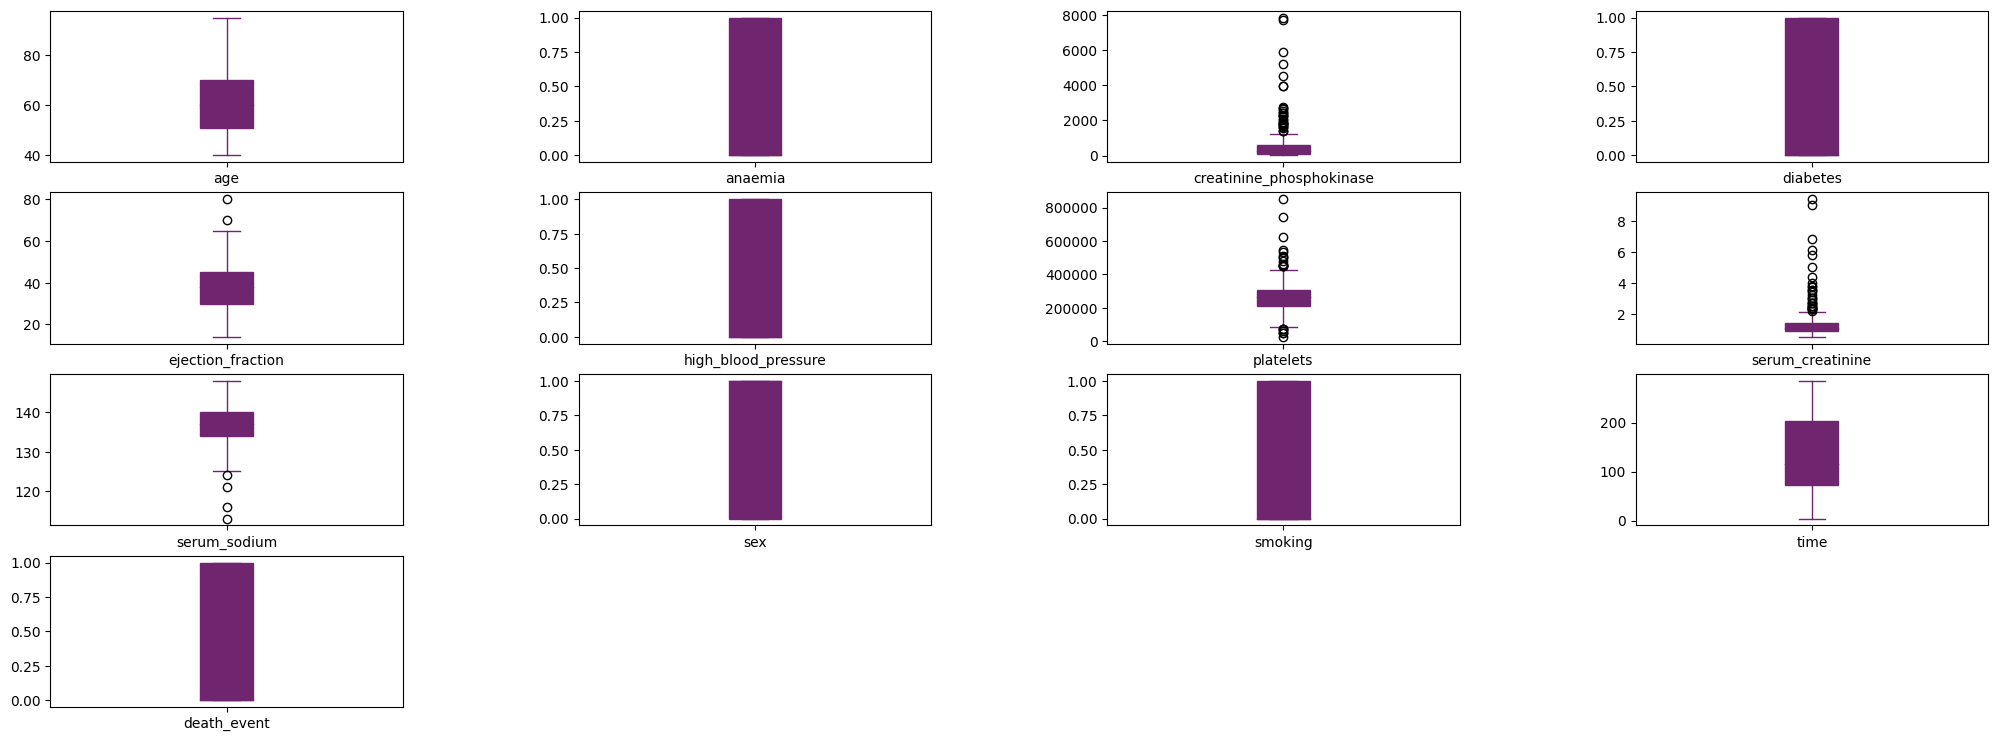

In [12]:
# finding Outlier 

nums = data.select_dtypes(exclude=["object"])
nums.plot(subplots = True , kind ='box', layout = (15,4), figsize = (25,35), patch_artist= True ,color = "#6F266E")
plt.subplots_adjust(wspace = 0.5)
plt.style.use("ggplot")
plt.show()


# outliers present in data

In [13]:
# removing outlier 
data = data.drop(data[data['serum_creatinine']>2.5].index)
data = data.drop(data[data['platelets']>420000].index)
data = data.drop(data[data['creatinine_phosphokinase']>1500].index)


<AxesSubplot: >

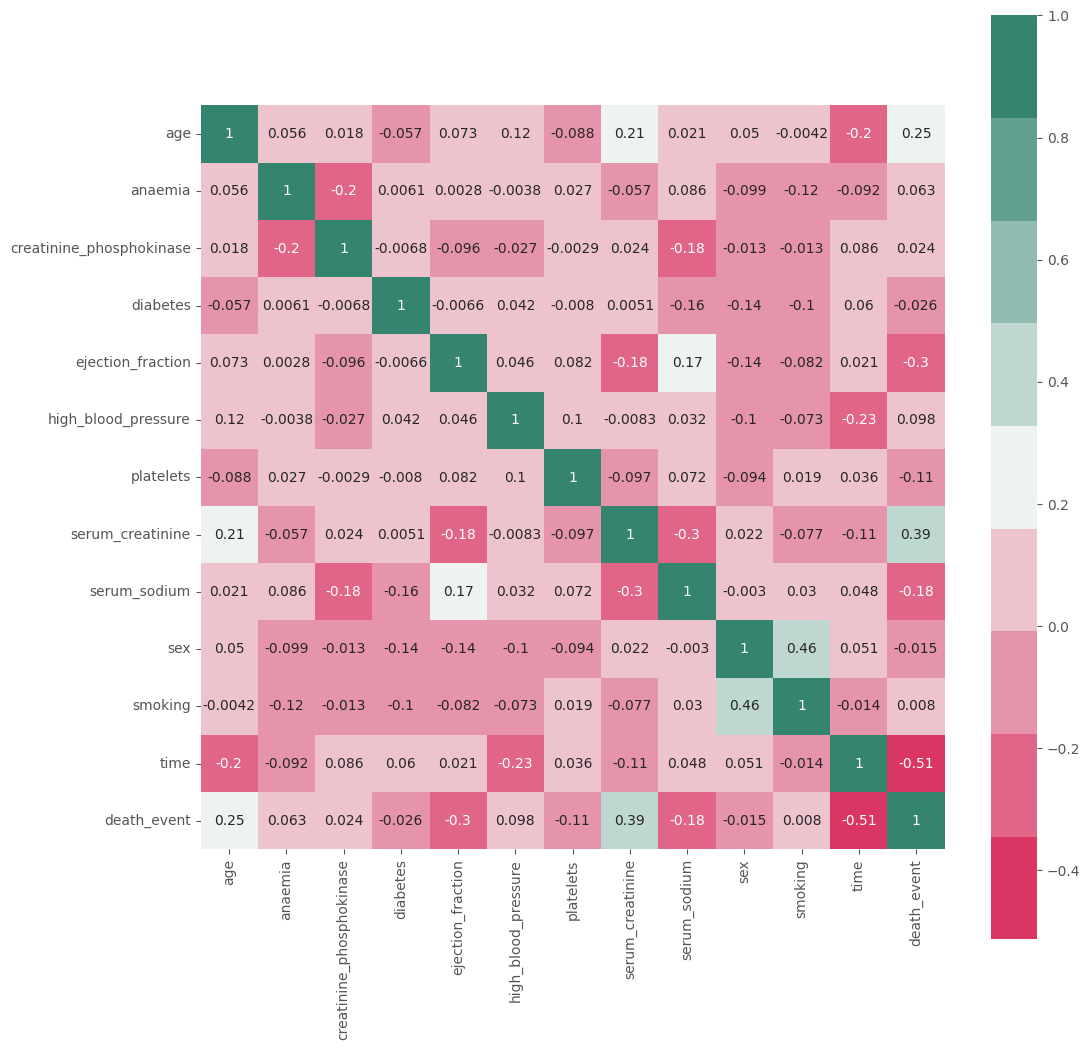

In [14]:
cmap = sns.diverging_palette(2, 165, s=80, l=50, n=9)
corrmap = data.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmap, cmap=cmap, annot=True, square=True)

In [15]:
# splitting data in training and testing data
Features = ['time','ejection_fraction','serum_creatinine']
X = data[Features]
y = data["death_event"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
time,239.0,0.000000e+00,1.002099,-1.680307,-0.749317,-0.174877,0.921183,2.030447
ejection_fraction,239.0,-1.077706e-16,1.002099,-2.023151,-0.686732,-0.018523,0.566161,3.489578
serum_creatinine,239.0,-3.270280e-16,1.002099,-1.460391,-0.710749,-0.210987,0.288774,3.287344


## ANN

In [17]:
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [18]:


# create the model 
model = Sequential()
model.add(Dense(32,input_dim=3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

# fit the model to the training data
history = model.fit(X_train, y_train,validation_data=(X_test, y_test) ,epochs=100, batch_size=10)

Epoch 1/100
20/20 [==============================] - 5s 64ms/step - loss: 5.1258 - accuracy: 0.6806 - val_loss: 2.8312 - val_accuracy: 0.7708
Epoch 2/100
20/20 [==============================] - 0s 17ms/step - loss: 3.0946 - accuracy: 0.6806 - val_loss: 1.9657 - val_accuracy: 0.6458
Epoch 3/100
20/20 [==============================] - 0s 13ms/step - loss: 2.2341 - accuracy: 0.5969 - val_loss: 1.7153 - val_accuracy: 0.6667
Epoch 4/100
20/20 [==============================] - 0s 13ms/step - loss: 1.9498 - accuracy: 0.6702 - val_loss: 1.5551 - val_accuracy: 0.6458
Epoch 5/100
20/20 [==============================] - 0s 14ms/step - loss: 1.6581 - accuracy: 0.6073 - val_loss: 1.1951 - val_accuracy: 0.7292
Epoch 6/100
20/20 [==============================] - 0s 12ms/step - loss: 1.3908 - accuracy: 0.6806 - val_loss: 1.0850 - val_accuracy: 0.6458
Epoch 7/100
20/20 [==============================] - 0s 12ms/step - loss: 1.1418 - accuracy: 0.6911 - val_loss: 0.8468 - val_accuracy: 0.6875
Epoch 

In [19]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 85.94%


Plotting Training and Validation Loss over Epochs

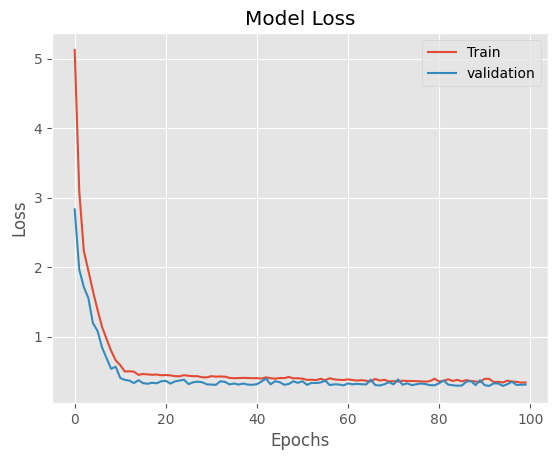

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'validation'],loc='upper right')
plt.show()

Plotting Training and Validation Accuracy over Epochs

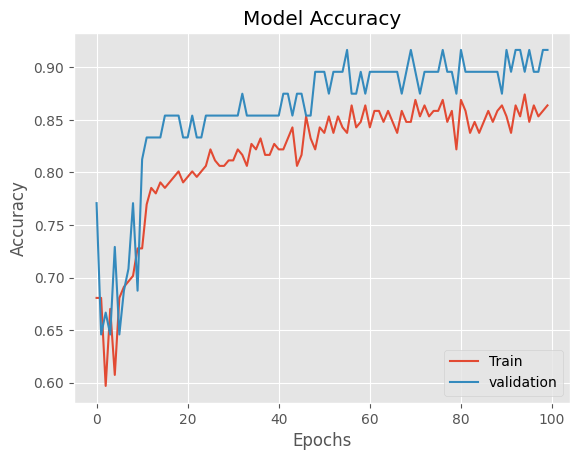

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'validation'],loc='lower right')
plt.show()

## Conclusion  

Testing on the test set      

Evaluating the confusion matrix      
  
Evaluating the classification report 

In [22]:
# prediction the test set results 

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


2/2 [==============================] - 0s 8ms/step


<AxesSubplot: >

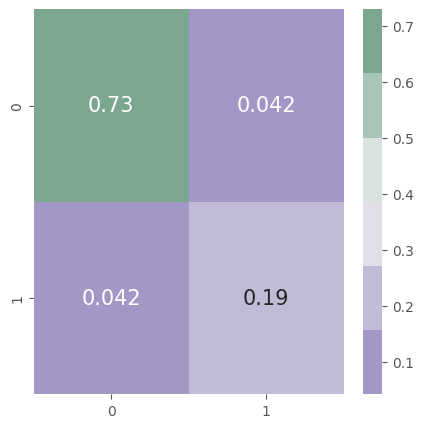

In [23]:
# confusion matrix
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(5,5))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        37
           1       0.82      0.82      0.82        11

    accuracy                           0.92        48
   macro avg       0.88      0.88      0.88        48
weighted avg       0.92      0.92      0.92        48

